In [0]:
import numpy as np
import tensorflow as tf
corpus_raw = 'He is the king . The king is royal . She is the royal  queen '
# convert to lower case
corpus_raw = corpus_raw.lower()



[Quick Brown Fox Example](https://drive.google.com/open?id=1n8ElxWjh1a9kdPTCBbCmvP7MKj5vtD4U)

In [0]:
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [55]:
print(word2int['queen'])

0


In [56]:
print(int2word[0])

queen


In [57]:
print(word2int['king'])

6


In [58]:
print(int2word[6])

king


### Creation of sentences

In [0]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [60]:
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


### Creation of windows for word pairs

In [0]:
data = []
WINDOW_SIZE = 2
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [62]:
print(data)

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['the', 'is'], ['king', 'the'], ['king', 'is'], ['king', 'royal'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'royal'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['the', 'queen'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]


### One-hot vector encoding
say we have a vocabulary of 3 words : pen, pineapple, apple

- word2int['pen'] -> 0 -> [1 0 0]
- word2int['pineapple'] -> 1 -> [0 1 0]
- word2int['apple'] -> 2 -> [0 0 1]

In [0]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [64]:
print(x_train)

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [65]:
print(x_train.shape, y_train.shape)

(34, 7) (34, 7)


### Creation of Tensorflow model
#### Create Placeholders

In [0]:
# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

[Architecture](https://drive.google.com/open?id=1svyZ4AxL5YX4j1Wl_QGYVcCC9iiP6iXR)

In [0]:
EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

[Predictions](https://drive.google.com/open?id=122xvSIqD1G5tkAdO7BmT4gLAtKL990A4)

In [0]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

[Summary of embeddings](https://drive.google.com/open?id=1vlUxYlCAp_U0QmWgYizn8SRgxEpPsDDm)

In [69]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 10000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  4.3900347
loss is :  3.895931
loss is :  3.52345
loss is :  3.237502
loss is :  3.0138233
loss is :  2.8350391
loss is :  2.6891406
loss is :  2.5681493
loss is :  2.4668033
loss is :  2.3815114
loss is :  2.3096356
loss is :  2.2490487
loss is :  2.1978974
loss is :  2.1545086
loss is :  2.1173847
loss is :  2.0852306
loss is :  2.0569744
loss is :  2.0317674
loss is :  2.008962
loss is :  1.9880755
loss is :  1.9687569
loss is :  1.95075
loss is :  1.9338675
loss is :  1.9179705
loss is :  1.9029554
loss is :  1.8887395
loss is :  1.8752581
loss is :  1.8624572
loss is :  1.8502911
loss is :  1.8387203
loss is :  1.8277097
loss is :  1.8172274
loss is :  1.8072443
loss is :  1.7977335
loss is :  1.7886701
loss is :  1.7800304
loss is :  1.7717923
loss is :  1.7639346
loss is :  1.7564374
loss is :  1.7492816
loss is :  1.7424494
loss is :  1.7359228
loss is :  1.7296858
loss is :  1.7237225
loss is :  1.7180178
loss is :  1.7125576
loss is :  1.7073278
loss is :  1.7023159

In [70]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[-2.4005034   0.21598397  1.5391469   0.19278507 -0.19150111]
 [ 0.18487537  0.9779251   0.7712163   0.86185944 -0.8882933 ]
 [ 1.1719072  -0.63847613  2.4034612  -0.7284265  -0.02854059]
 [ 0.4150631   1.4896955  -0.40249515  0.533727   -0.9631046 ]
 [-1.1247603   0.98626745 -1.5535712  -2.236138    0.79639447]
 [ 1.2118938  -1.2051603  -0.30680165  0.14811832  2.2457874 ]
 [-0.88811255  0.8210452   0.9677008   1.8084168   0.07195856]]
----------
[0.32908136 0.8363904  1.2696398  0.60244215 0.5270263 ]
----------


In [71]:
vectors = sess.run(W1 + b1)

# if you work it out, you will see that it has the same effect as running the node hidden representation
print(vectors)

[[-2.071422    1.0523744   2.8087869   0.7952272   0.33552518]
 [ 0.5139567   1.8143156   2.0408561   1.4643016  -0.36126703]
 [ 1.5009885   0.19791424  3.673101   -0.12598437  0.4984857 ]
 [ 0.74414444  2.326086    0.8671447   1.1361692  -0.4360783 ]
 [-0.7956789   1.8226578  -0.28393137 -1.633696    1.3234208 ]
 [ 1.5409751  -0.36876988  0.9628382   0.75056046  2.7728138 ]
 [-0.5590312   1.6574357   2.2373407   2.410859    0.59898484]]


In [72]:
print(vectors[ word2int['queen'] ])

[-2.071422    1.0523744   2.8087869   0.7952272   0.33552518]


In [0]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))
def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [74]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

she
king
she


In [0]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

In [0]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

queen -0.46998915
she -0.8200383
royal -0.37162837
he 0.96736276
is -0.8763655
the -0.98015857
king 0.39720574


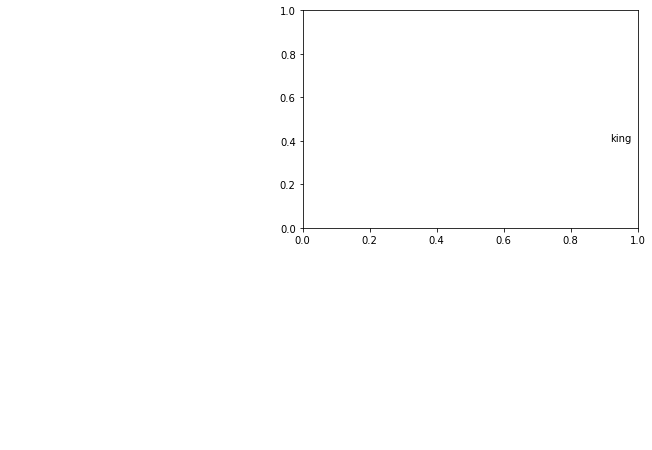

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()